🚀 Sedang membaca seluruh dataset...
✅ Data siap! Total lowongan yang akan dianalisis: 61,953 baris.
   (Proses ini mungkin memakan waktu 1-2 menit tergantung kecepatan laptop)


🔍 Scanning Lowongan: 100%|██████████| 61953/61953 [07:02<00:00, 146.75it/s]



📊 Grafik batang tersimpan: top_20_skills_analysis.png
☁️  Sedang merender Word Cloud...
☁️  Word Cloud tersimpan: wordcloud_full.png

✅ SELESAI! Silakan cek file gambar di folder proyekmu.


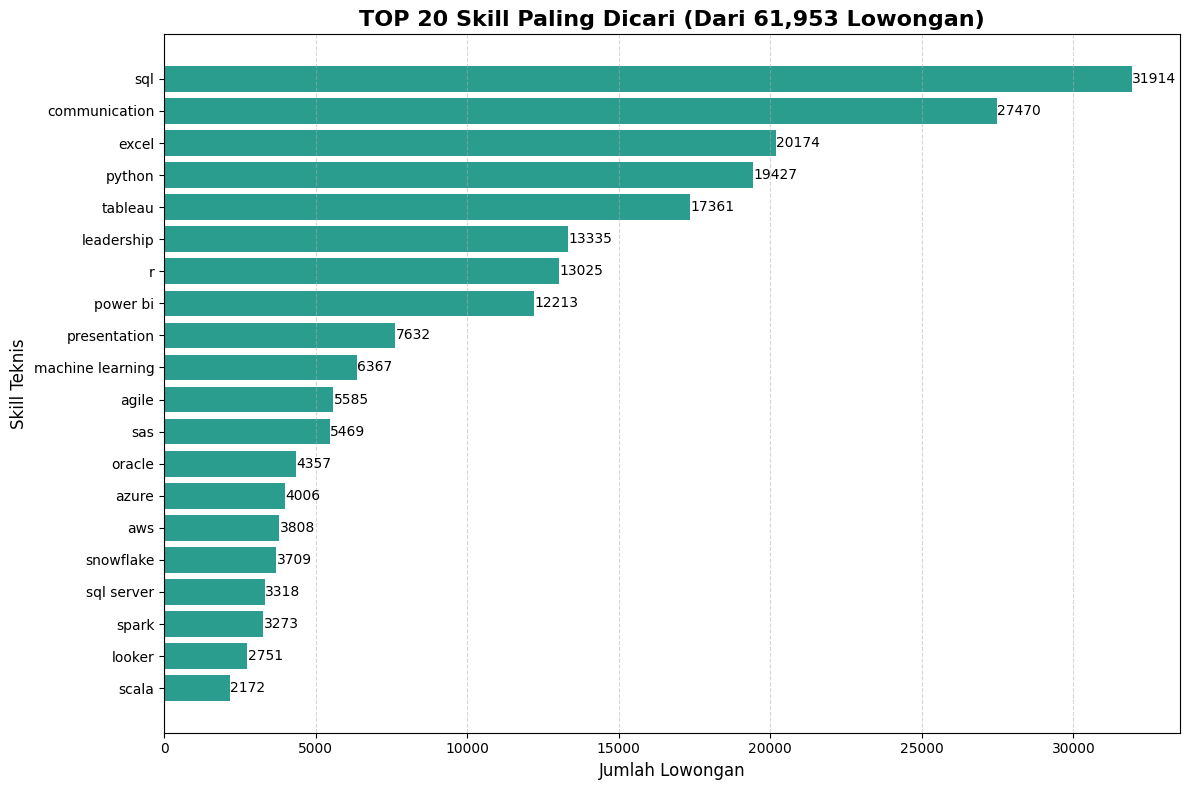

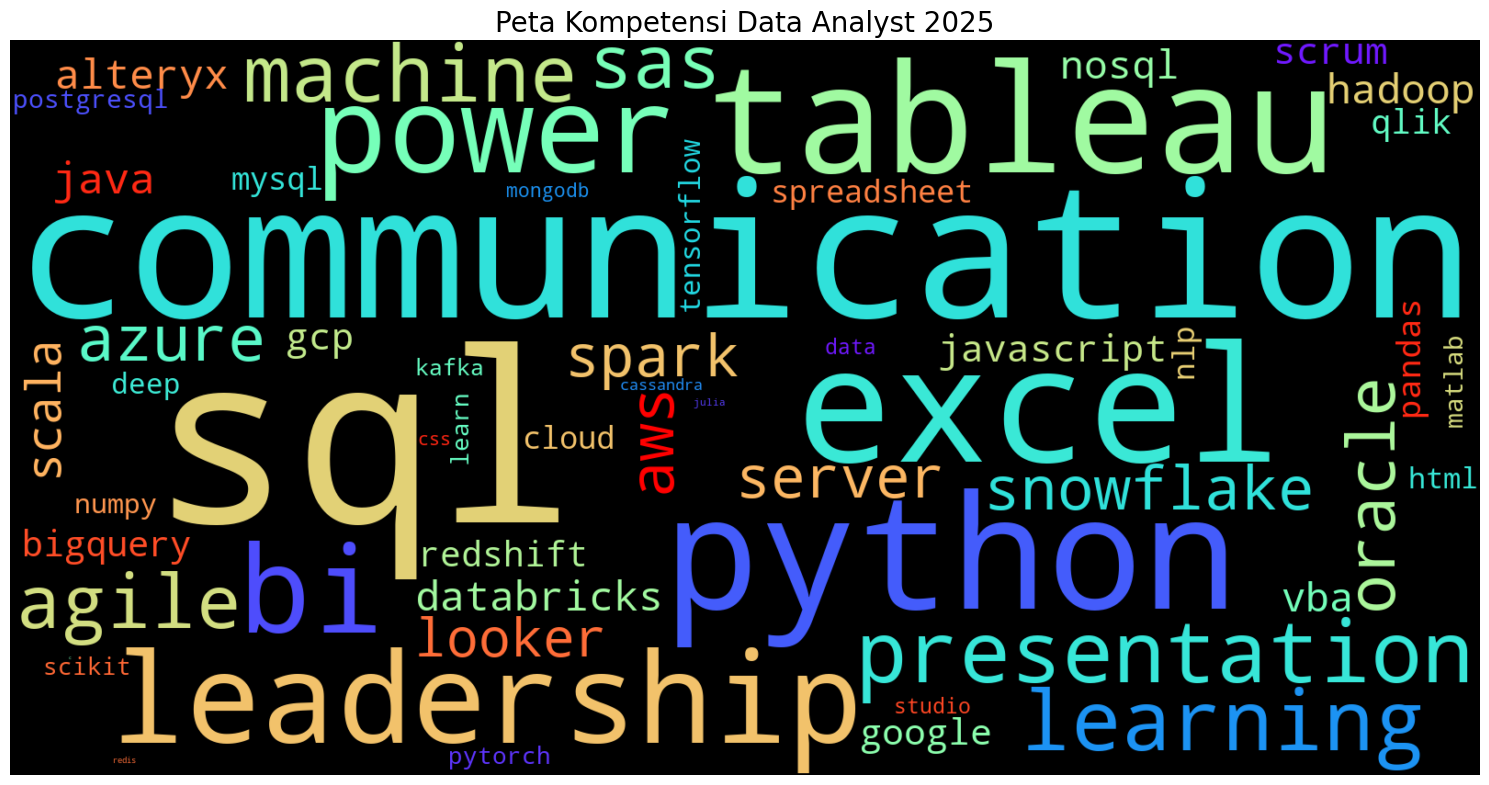

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
from tqdm import tqdm  # Library untuk loading bar

# ==========================================
# 1. SETUP & LOAD DATA (FULL VERSION)
# ==========================================
csv_file = 'gsearch_jobs.csv' # Pastikan nama file sesuai

print("🚀 Sedang membaca seluruh dataset...")
# Load semua data tanpa limit baris
df = pd.read_csv(csv_file, on_bad_lines='skip')

# Buang baris yang deskripsinya kosong (NaN) agar tidak error
df = df.dropna(subset=['description'])

# Ubah semua deskripsi ke string dulu biar aman
df['description'] = df['description'].astype(str)

print(f"✅ Data siap! Total lowongan yang akan dianalisis: {len(df):,} baris.")
print("   (Proses ini mungkin memakan waktu 1-2 menit tergantung kecepatan laptop)")

# ==========================================
# 2. DEFINISI SKILL (SUPER LENGKAP)
# ==========================================
# Kita kelompokkan biar rapi (meski nanti digabung saat pencarian)
skills_programming = ['python', 'r', 'java', 'c++', 'scala', 'julia', 'sas', 'matlab', 'javascript', 'html', 'css', 'vba']
skills_database    = ['sql', 'mysql', 'postgresql', 'oracle', 'sql server', 'mongodb', 'nosql', 'cassandra', 'redis']
skills_bi_viz      = ['excel', 'tableau', 'power bi', 'looker', 'qlik', 'google data studio', 'alteryx', 'spreadsheet']
skills_cloud_bigdata = ['aws', 'azure', 'google cloud', 'gcp', 'snowflake', 'databricks', 'spark', 'hadoop', 'kafka', 'bigquery', 'redshift']
skills_ai_ml       = ['machine learning', 'deep learning', 'scikit-learn', 'tensorflow', 'pytorch', 'nlp', 'pandas', 'numpy']
skills_soft        = ['communication', 'presentation', 'leadership', 'agile', 'scrum']

# Gabungkan semua list jadi satu target besar
target_skills = skills_programming + skills_database + skills_bi_viz + skills_cloud_bigdata + skills_ai_ml + skills_soft

# ==========================================
# 3. ENGINE PENCARIAN (DENGAN PROGRESS BAR)
# ==========================================
def cek_skill(deskripsi):
    found = []
    deskripsi = deskripsi.lower()
    for skill in target_skills:
        # Gunakan regex \b agar akurat (contoh: membedakan 'java' dan 'javascript')
        # re.escape digunakan jika ada karakter spesial seperti C++
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, deskripsi):
            found.append(skill)
    return found

all_found_skills = []

# tqdm() membuat loading bar berjalan
for desc in tqdm(df['description'], desc="🔍 Scanning Lowongan"):
    skills = cek_skill(desc)
    all_found_skills.extend(skills)

# ==========================================
# 4. VISUALISASI 1: TOP 20 SKILL (BAR CHART)
# ==========================================
# Hitung frekuensi
skill_counts = Counter(all_found_skills)

# Ambil cuma 20 skill teratas biar grafik gak semrawut
top_skills = pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Jumlah']).sort_values('Jumlah', ascending=True)

plt.figure(figsize=(12, 8))
# Ganti warna jadi gradasi atau warna solid yang tegas
plt.barh(top_skills['Skill'], top_skills['Jumlah'], color='#2a9d8f') 

plt.title(f'TOP 20 Skill Paling Dicari (Dari {len(df):,} Lowongan)', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Lowongan', fontsize=12)
plt.ylabel('Skill Teknis', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Menambahkan label angka di ujung batang
for index, value in enumerate(top_skills['Jumlah']):
    plt.text(value + 10, index, str(value), va='center')

plt.tight_layout()
plt.savefig('top_20_skills_analysis.png', dpi=300) # Simpan resolusi tinggi
print("\n📊 Grafik batang tersimpan: top_20_skills_analysis.png")

# ==========================================
# 5. VISUALISASI 2: WORD CLOUD (FULL)
# ==========================================
print("☁️  Sedang merender Word Cloud...")
text_gabungan = " ".join(all_found_skills)

wc = WordCloud(
    width=1600, height=800, 
    background_color='black', # Background hitam biar warna skill 'pop up'
    colormap='rainbow',       # Warna-warni cerah
    collocations=False        # Hindari pengulangan kata ganda
).generate(text_gabungan)

plt.figure(figsize=(15, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Peta Kompetensi Data Analyst 2025', fontsize=20)
plt.tight_layout()
plt.savefig('wordcloud_full.png', dpi=300)
print("☁️  Word Cloud tersimpan: wordcloud_full.png")

print("\n✅ SELESAI! Silakan cek file gambar di folder proyekmu.")